# California Housing Prices Analysis

## Introduction

In this project, we will analyze the California Housing Prices dataset to understand the key factors influencing housing prices across different locations in California. This dataset provides a rich collection of features, ranging from geographic and demographic information to economic indicators, allowing us to explore various aspects of housing data. Through data analysis, exploratory data analysis (EDA), and feature engineering, we aim to uncover meaningful insights and relationships within the dataset.

The analysis will be structured to help us:
- Understand the distribution and relationships of housing-related features,
- Identify factors most strongly correlated with housing prices,
- Apply data engineering techniques to transform and refine the data for more effective analysis.

By the end of this notebook, we aim to build a strong foundation of insights and engineered features to support potential predictive modeling and better data-driven decisions regarding California’s housing market.

<br>
<br>

**Section 1 and Section 2 contain data analysis and EDA being applied to data. If you want to land straight at "Machine Learning Section", please jump to Section 3.**

<br>
<br>

## Dataset Description

The **California Housing Prices dataset** contains the following columns:

1. **longitude**: A measure of the distance westward within California; a higher value indicates a farther west location.
2. **latitude**: A measure of the distance northward; a higher value is farther north.
3. **housingMedianAge**: The median age of houses within a block, with a lower number indicating newer buildings.
4. **totalRooms**: The total number of rooms within a block of houses.
5. **totalBedrooms**: The total number of bedrooms within a block.
6. **population**: The total population within a block.
7. **households**: The total number of households within a block, where a household is a group of people residing together in a single unit.
8. **medianIncome**: The median income for households within a block, measured in tens of thousands of US dollars.
9. **medianHouseValue**: The median house value for households within a block, measured in US dollars.
10. **oceanProximity**: The location of the house relative to the ocean, providing categorical information on the house’s proximity to the sea.

The dataset offers a comprehensive view of various factors that could impact housing prices, making it an excellent resource for both data analysis and feature engineering. We will explore each of these features to understand their distribution and relationships with housing prices, enabling us to uncover the most influential factors in this housing market data.


# Section 1: **Exploratory Data Analysis (EDA)**

In this section, we will conduct an in-depth exploratory data analysis (EDA) of the California Housing Prices dataset to uncover patterns, relationships, and insights within the data. Our analysis will involve both univariate and multivariate analysis techniques to understand each feature's distribution and its impact on housing prices. We will examine key statistics, visualize data distributions, explore correlations, and identify any trends or outliers present in the dataset.

Our EDA will focus on:
- **Understanding feature distributions**: Checking the spread and skewness of each feature to determine how it varies across different ranges of housing prices.
- **Investigating relationships**: Exploring correlations and relationships between features, particularly those linked to housing prices.
- **Identifying patterns and anomalies**: Looking for patterns, trends, and potential outliers that may provide insights or need handling before further analysis.

By the end of this EDA, we aim to gain a comprehensive understanding of the dataset’s structure and key factors, setting a solid foundation for data engineering and predictive modeling.


## Let's Start

To kick off our analysis, we'll first load the essential libraries needed for data manipulation, analysis, and visualization. The key libraries we'll be using are:

- **Pandas**: For loading and managing our dataset, as well as performing data manipulation tasks such as handling missing values, grouping, and filtering.
- **NumPy**: For numerical operations and managing arrays, which can help streamline data transformations.
- **Matplotlib and Seaborn**: For creating insightful visualizations. Matplotlib provides general plotting functionality, while Seaborn makes it easier to create aesthetically pleasing statistical plots.
- **Scipy**: This library may also be used for certain statistical functions if needed, adding depth to our analysis.

These libraries will equip us with all the tools needed for exploratory data analysis (EDA) and help us uncover patterns within the dataset. Let’s import these libraries and load the dataset to begin!


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#data Frame df
df = pd.read_csv('housingn.csv')

In [ ]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 1.1 Initial Data Inspection

In this step we will inspect data. Data inspection means checking number of columns & rows, objects and datatypes, missing values and total count etc.


In [ ]:
#Inspecting The Data

print(df.head(5))
print("--"*30)
print(df.info())
print("--"*30)
print(df.describe())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
------------------------------------------------------------
<class 'pandas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 1.2 Checking For Missing Values
In this step, we will check for any missing values in the dataset. Identifying missing data is crucial because it can lead to inaccurate analysis and poor model performance if not handled appropriately.


### What to Analyze
- Presence of Missing Values: Identify which columns (if any) have missing values.
- Extent of Missingness: Note the number of missing values in each column, if any are present.
- Plan Next Steps: Based on the results, we can discuss strategies to handle missing values, such as removing rows, filling missing values, or using other techniques.

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


## 1.3 Handling Missing Values

We see that there are 207 values missing in this "total_bedrooms" columns.

<br>

Now there may be many other strategies that you might tend to deploy.
- We can either remove the missing rows completely.
- Or Fill the missing values using techniques such as Median, Mean or imputation.

Lets first check for outliers in our data.

### Checking for Outliers in total_bedrooms
Outliers can skew your data, so it's important to identify them. Here are some methods to check for outliers:

1. Boxplot: A boxplot visually shows the distribution of the data and identifies potential outliers as points outside the whiskers.

2. Z-score: This statistical method identifies outliers by measuring how far a data point is from the mean in terms of standard deviations.

3. IQR (Interquartile Range): Outliers can be identified using the IQR method, which defines outliers as data points.

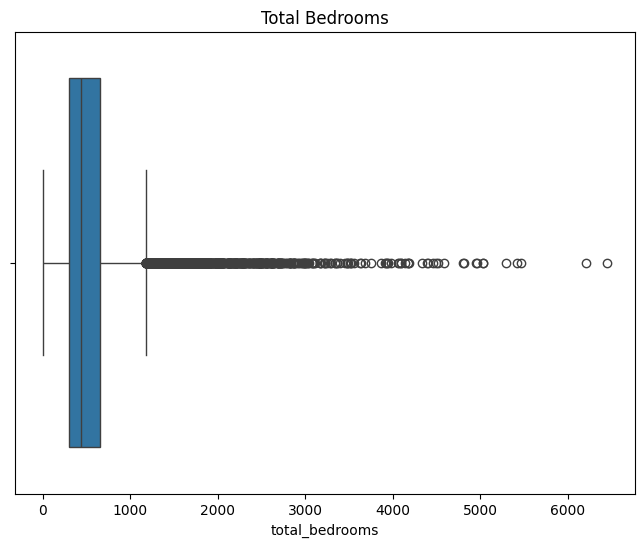

In [ ]:
#Boxplot

plt.figure(figsize=(8 , 6))
sns.boxplot(x = df['total_bedrooms'])
plt.title("Total Bedrooms")
plt.show()


In [ ]:
#Fonding Interquartile Range

Q1 = df["total_bedrooms"].quantile(0.25)
Q3 = df["total_bedrooms"].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df["total_bedrooms"]<lower_bound) | (df["total_bedrooms"]>upper_bound) ]
print(f"Number of Outliers is : {outliers.shape[0]} ")

Number of Outliers is : 1271 


Hence we see that there are total 1271 outliers in our data.
<br>
What we do next?
<br>
It may be your own choice to either remove outliers, leave them as it is or cap them.

## 1.4 Cap the Outliers:

If you don't want to remove the outliers, you can "cap" them by setting them to the upper or lower bounds. This helps to mitigate the impact of extreme values without losing data.

In [ ]:
df["total_bedrooms"] = df["total_bedrooms"].clip (lower = lower_bound , upper=upper_bound)

Lets plot boxplot now and see the impact.

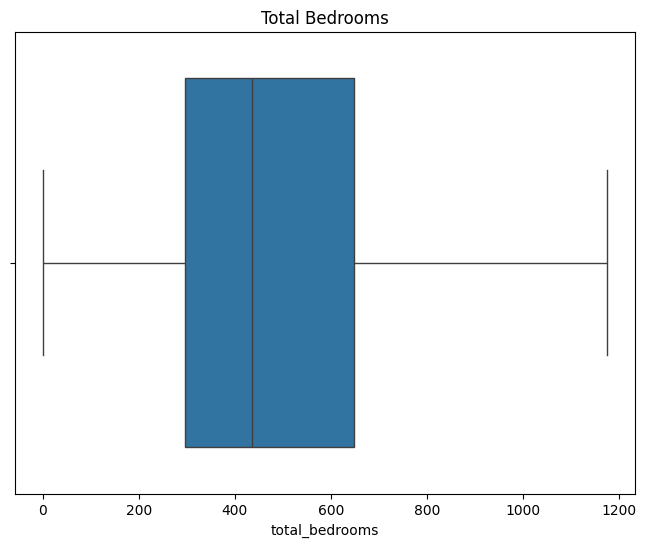

In [ ]:

plt.figure(figsize=(8 , 6))
sns.boxplot(x = df['total_bedrooms'])
plt.title("Total Bedrooms")
plt.show()

Now that we have handled outliers, lets go back to the step where we were handling missing values.

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Since the column has been capped, filling missing values with the median is often a good choice. The median is less sensitive to outliers and provides a reasonable estimate for missing values.

In [ ]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

Lets check missing value count now.

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Thats it.
<br>
Missing values are handled.

Here comes the most awaited thing. "EDA". Exploratory Data Analysis.

## Section 2: Exploratory Data Analysis(EDA)

EDA typically invovles:
1. Visualizing Data Distributions:
     - We'll plot histograms and boxplots for key numerical features to understand their distributions and check for any patterns or skewness.

2. Analyzing Correlations:
    - We'll check the correlation between numerical features to see which variables are strongly correlated, which might help in feature selection for modeling.

3. Categorical Data Analysis:
    - Since you have a categorical feature (oceanProximity), we can analyze its distribution and see how it relates to the numerical features.

## 2.1 Visualizing the Distribution of Key Numerical Features
We'll start by visualizing the distribution of key numerical features using histograms and boxplots. This will help us understand the spread, skewness, and potential outliers in the dat

In [ ]:
numerical_columns = df.select_dtypes(include = ['float64' , 'int64']).columns

In [ ]:
print(numerical_columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


### 2.1.1 Histogram Plot
Plotting histograms of all numerical columns.

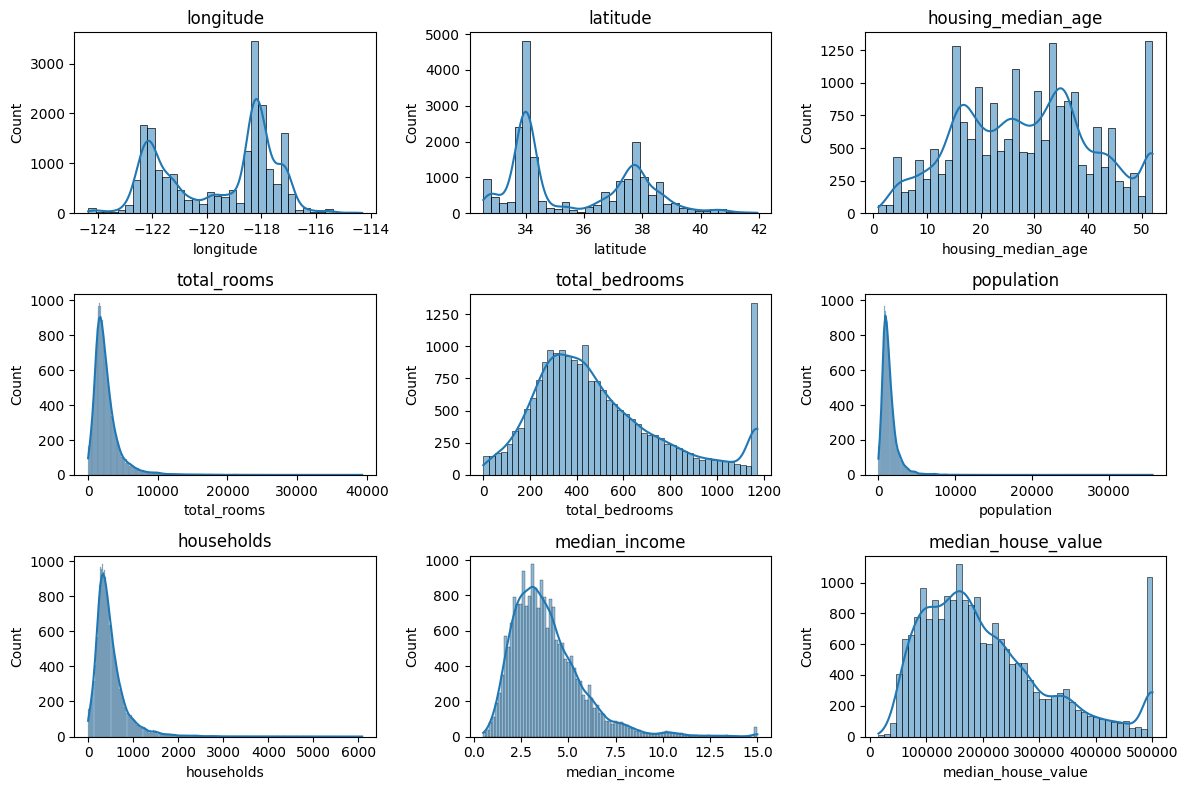

In [ ]:
plt.figure(figsize=(12 , 8))

for i , columns in enumerate(numerical_columns , 1):
    plt.subplot(3 , 3 , i)
    sns.histplot(df[columns] , kde = True)
    plt.title(columns)

plt.tight_layout()
plt.show()

### 2.1.2 Boxplot
Plotting boxplot for all Numerical Columns.

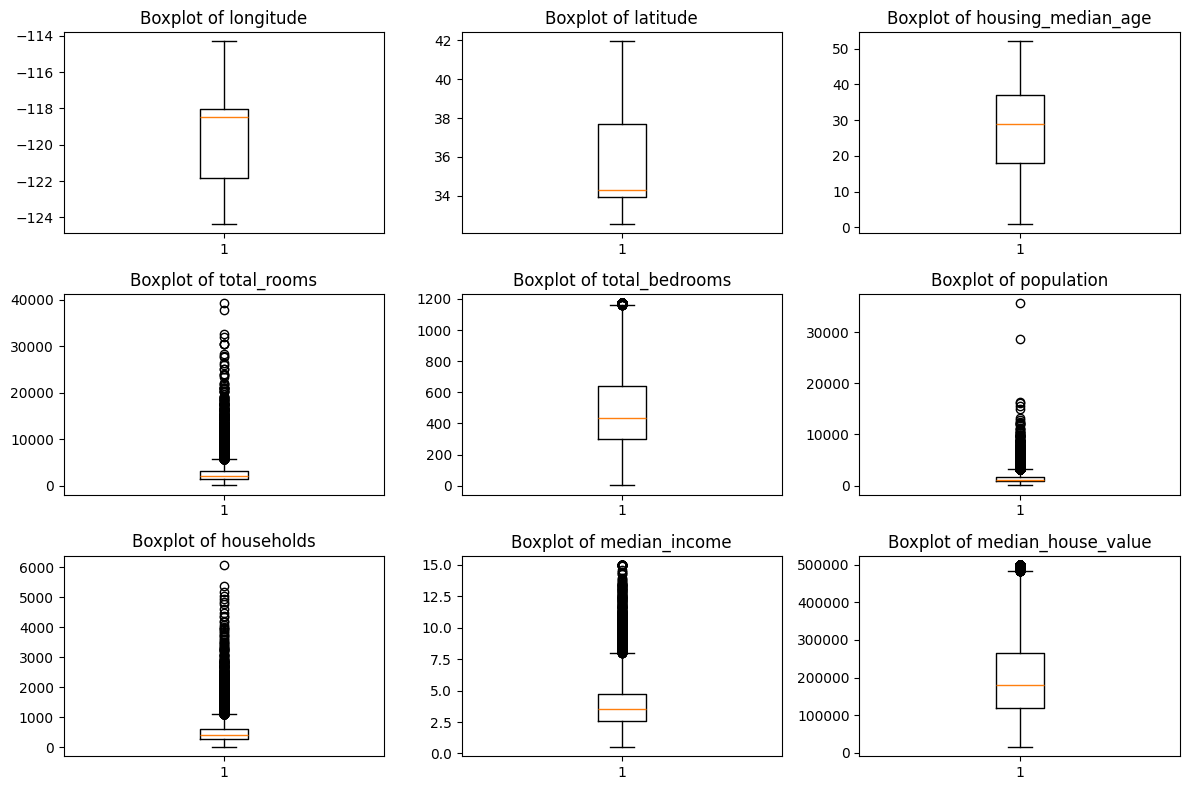

In [ ]:
plt.figure(figsize=(12 , 8))

for i , columns in enumerate(numerical_columns , 1):
    plt.subplot(3 , 3 , i)
    #plt.boxplot(x=df[columns])
    plt.boxplot(df[columns])
    plt.title(f"Boxplot of {columns}")

plt.tight_layout()
plt.show()

We see that there are many outliers in some columns. But let's keep them for the time being, as in this project our ultimate focus is data-analysis and EDA.
<br>


## 2.2 Analyzing Correlations

1. Calculate the Correlation Matrix:

   - This matrix shows the correlation coefficients between all pairs of numerical features.
   - Correlation values range from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.
2. Visualize the Correlation Matrix:

   - We'll use a heatmap to visualize the correlations, making it easier to spot strong positive or negative correlations.

Extracting a dataset with only numerical values and not strings.

In [ ]:
numerical_columns = df.select_dtypes(include = ['float64' , 'int64'])

In [ ]:
print(type(numerical_columns))
print(type(df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


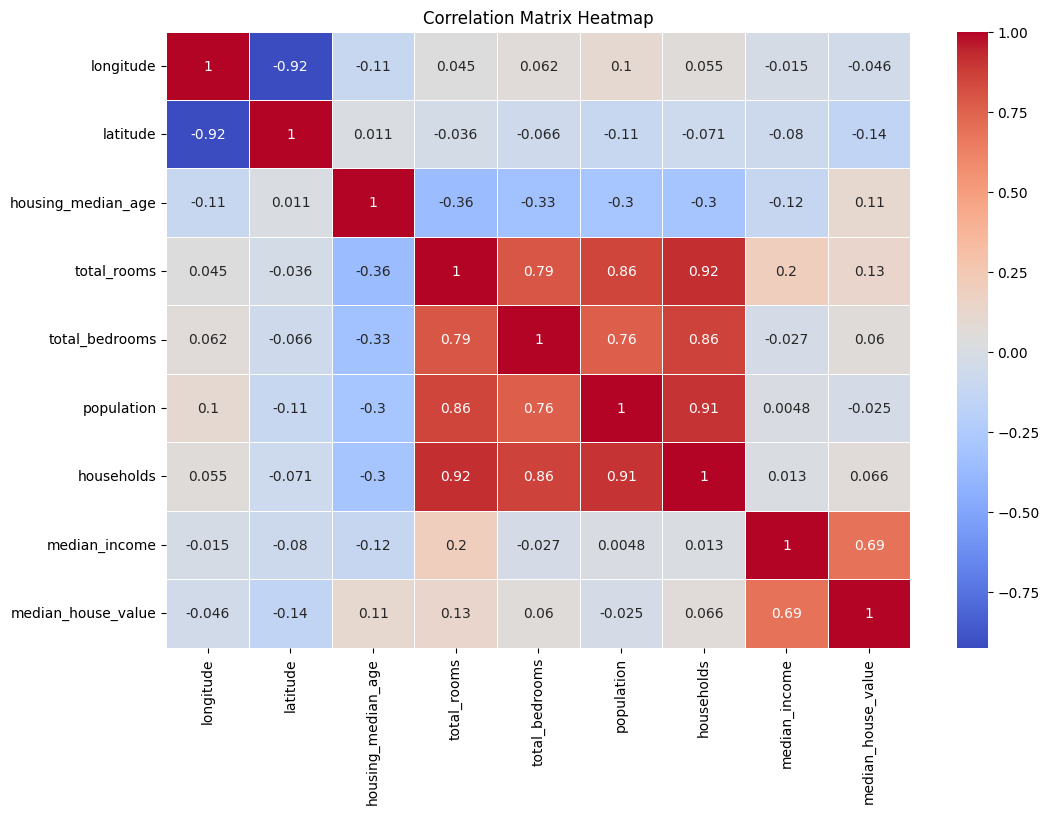

In [ ]:
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(12 , 8))
sns.heatmap(corr_matrix , annot = True , cmap = 'coolwarm' , linewidth = 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### What we observe from this matrix?

The sharp red color shows very strong relationship while sharp blue shows complete independency of the variables.
<br>
We do not see any close relationship between most of the features.
Some close relationships are between households, total rooms, population and total bedrooms.

<br>
Right now, we are only interested in exploring features. What information we get from these will be discussed in another coming project in which we will design a ML Model at this dataset.

### 2.2.1 Visualizing Relationships Between Key Features:

Next we are visualizing relationships between key features of dataset.

We will create pairplots to visualize relationships between highly correlated features and the target variable. This can help in understanding the data distribution and relationships better.

In [ ]:
important_features = df.columns
print(important_features)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [ ]:
type(important_features)

pandas.core.indexes.base.Index

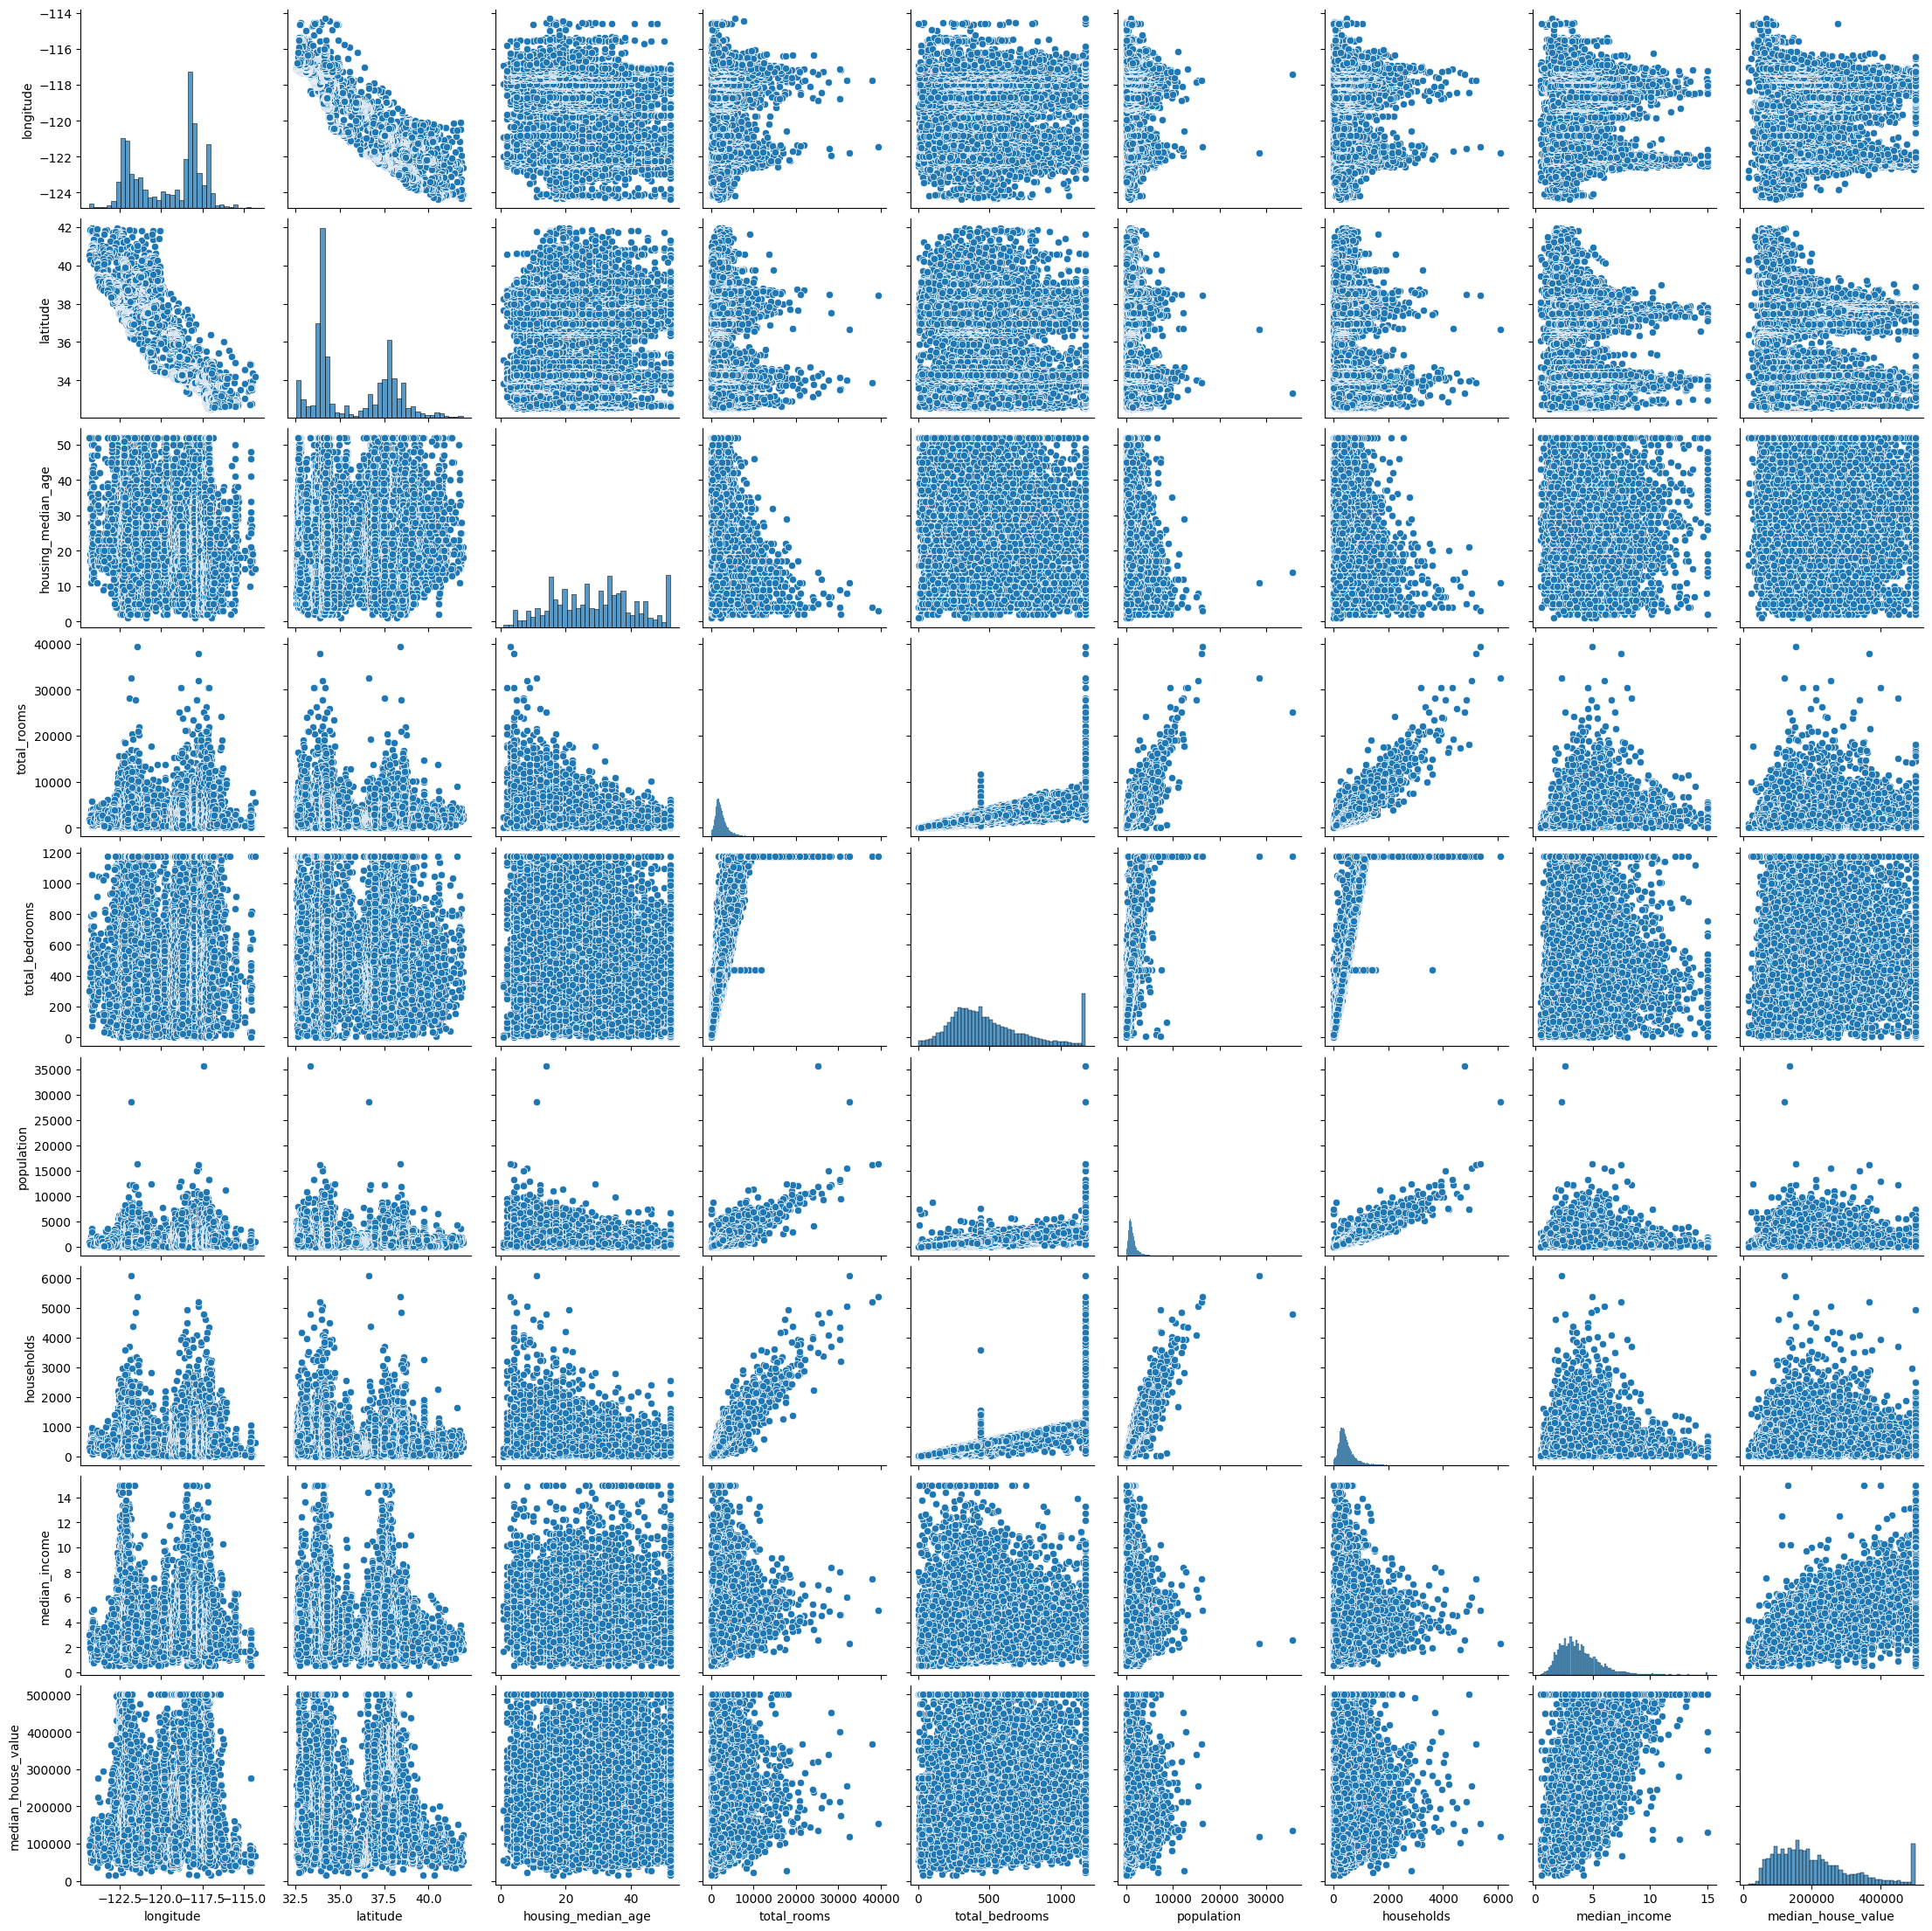

In [ ]:
sns.pairplot(df[important_features])
plt.show()

This draws relationship of all the features with each other. There is whole lot of information in it.


# Section 3: **Applying Machine Learning**

Next step in this journey is developing a model that predicts the housing prices. We will apply two types of Models to this data and observe accuracy of both.
- Linear Classifiers
- Tree Models

We will import all the libraries required for this task here.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import warnings

import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

#Train Test Split Libraries
from sklearn.model_selection import train_test_split

#Models
import torch
import torch.nn as nn
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

# Metrics
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

print("All Packages have been imported")

All Packages have been imported


## 3.1 Data Preprocessing

In this section, some steps already performed above may be repeated.

In [2]:
# Importing Dataset
df = pd.read_csv('housingn.csv')

In [ ]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## 3.1.1 Removing Missing Values

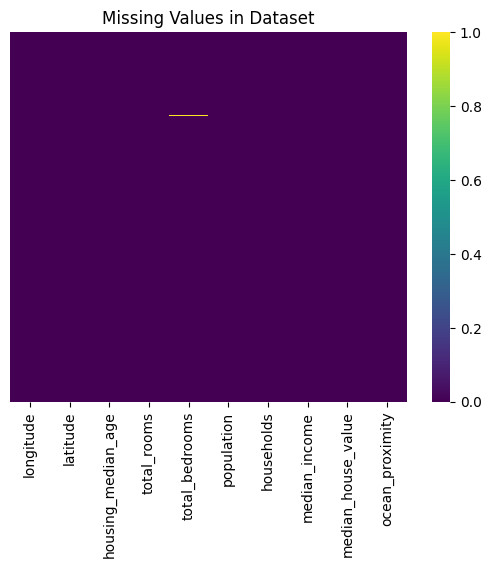

In [3]:
sns.heatmap(df.isnull() , yticklabels=False ,  cmap = 'viridis')
plt.title("Missing Values in Dataset")
plt.show()

In [4]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [5]:
# Filling missing values with median. For explanation you can look section 2.1 of this notbeook
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

In [6]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


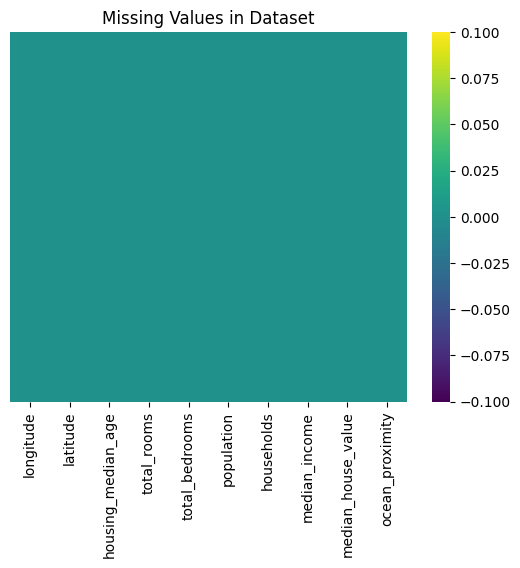

In [7]:
sns.heatmap(df.isnull() , yticklabels=False ,  cmap = 'viridis')
plt.title("Missing Values in Dataset")
plt.show()

## 3.1.2 Performing One-Hot Encoding

In [8]:
# Converting Ocean_Proximity, a categorical variable into relevant form
# One-hot Encoding
df = pd.get_dummies(df , columns = ['ocean_proximity'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 10  ocean_proximity_INLAND      20640 non-null  bool   
 11  ocean_proximity_ISLAND      20640 non-null  bool   
 12  ocean_proximity_NEAR BAY    20640 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  206

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


## 3.1.3 Splitting Data
Defining feature Variables and Target variables.

In [9]:
x = df.drop('median_house_value' , axis = 1)
y = df['median_house_value']

## 3.1.4 Normalizing & Scaling Data

In [10]:
pre_process = StandardScaler().fit(x)
x_transform = pre_process.transform(x)

In [ ]:
x_transform.shape

(20640, 13)

### 3.1.5 Splitting Dataset

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x_transform , y , test_size = 0.2 , random_state = 42)

## **3.2 Linear Classifiers**

### **3.2.1 Logistic Regression**

In [ ]:
# Defining a Model
linReg = LinearRegression()

# Fitting a model
linReg.fit(x_train , y_train)

LinearRegression()

## Prediction & Accuracy

In [ ]:
y_pred_linReg = linReg.predict(x_test)
linReg_mae = mean_absolute_error(y_test , y_pred_linReg)
linReg_mse = mean_squared_error(y_test , y_pred_linReg)
linReg_rmse = np.sqrt(linReg_mse)
linReg_r2 = r2_score(y_test , y_pred_linReg)
linReg_acc = linReg.score(x_test , y_test)

print(f'Mean Absolute Error (MAE): {linReg_mae}')
print(f'Mean Squared Error (MSE): {linReg_mse}')
print(f'Root Mean Squared Error (RMSE): {linReg_rmse}')
print(f'R-squared (R²): {linReg_r2}')
print(f'Accuracy: {linReg_acc}')

Mean Absolute Error (MAE): 50663.0730672623
Mean Squared Error (MSE): 4908847061.029956
Root Mean Squared Error (RMSE): 70063.16479456202
R-squared (R²): 0.6253958006591485
Accuracy: 0.6253958006591485


### **3.2.2 Support Vector Regressor**

In [ ]:
# Define the model (with a linear kernel, which is typical for regression tasks)
svr = SVR(kernel='linear', C=1, epsilon=0.1)

# Fit the model to the training data
svr.fit(x_train, y_train)

SVR(C=1, kernel='linear')

## Prediction & Accuracy

In [ ]:
# Make predictions
y_pred_svr = svr.predict(x_test)
svr_mae = mean_absolute_error(y_test , y_pred_svr)
svr_mse = mean_squared_error(y_test , y_pred_svr)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test , y_pred_svr)
svr_acc = svr.score(x_test , y_test)

print(f'Mean Absolute Error (MAE): {svr_mae}')
print(f'Mean Squared Error (MSE): {svr_mse}')
print(f'Root Mean Squared Error (RMSE): {svr_rmse}')
print(f'R-squared (R²): {svr_r2}')
print(f'Accuracy: {svr_acc}')

Mean Absolute Error (MAE): 77844.69859867681
Mean Squared Error (MSE): 11526730310.413555
Root Mean Squared Error (RMSE): 107362.61132449022
R-squared (R²): 0.12037154035016595
Accuracy: 0.12037154035016595


Very bad results

## **3.2.3  Hyperparameter Tuning of SVR**

In [ ]:
# Instantiate the SVR object
svm_regressor = SVR()

# Set up a grid for hyperparameter tuning
parameters = {
    "C": [1 , 5], # Regularization parameter
    'gamma': [ 0.001,0.01],  # Kernel coefficient
    'kernel': ['rbf']  # Consider both linear and RBF kernels
}

# Instantiate the GridSearchCV object
searcher = GridSearchCV(svm_regressor, parameters, cv=3)

In [ ]:
# Fit the model on the training data
searcher.fit(x_train, y_train)

# Print the best parameters and score
print("Best parameters found:", searcher.best_params_)
print("Best score:", searcher.best_score_)


Best parameters found: {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}
Best score: -0.045015364688093674


### Prediction & Accuracy

In [ ]:
# Make predictions
y_pred_svr = searcher.predict(x_test)
svr_mae2 = mean_absolute_error(y_test , y_pred_svr)
svr_mse2 = mean_squared_error(y_test , y_pred_svr)
svr_rmse2 = np.sqrt(svr_mse)
svr_r22 = r2_score(y_test , y_pred_svr)
svr_acc2 = svr.score(x_test , y_test)

print(f'Mean Absolute Error (MAE): {svr_mae2}')
print(f'Mean Squared Error (MSE): {svr_mse2}')
print(f'Root Mean Squared Error (RMSE): {svr_rmse2}')
print(f'R-squared (R²): {svr_r22}')
print(f'Accuracy: {svr_acc2}')

Mean Absolute Error (MAE): 86517.22760772861
Mean Squared Error (MSE): 13543720587.388073
Root Mean Squared Error (RMSE): 107362.61132449022
R-squared (R²): -0.033549129491560636
Accuracy: 0.12037154035016595


As a whole very bad results. We will fix these bugs in another project. In this project our focus is mainly just to design a model and test it.

<ipython-input-21-91919144b254>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')


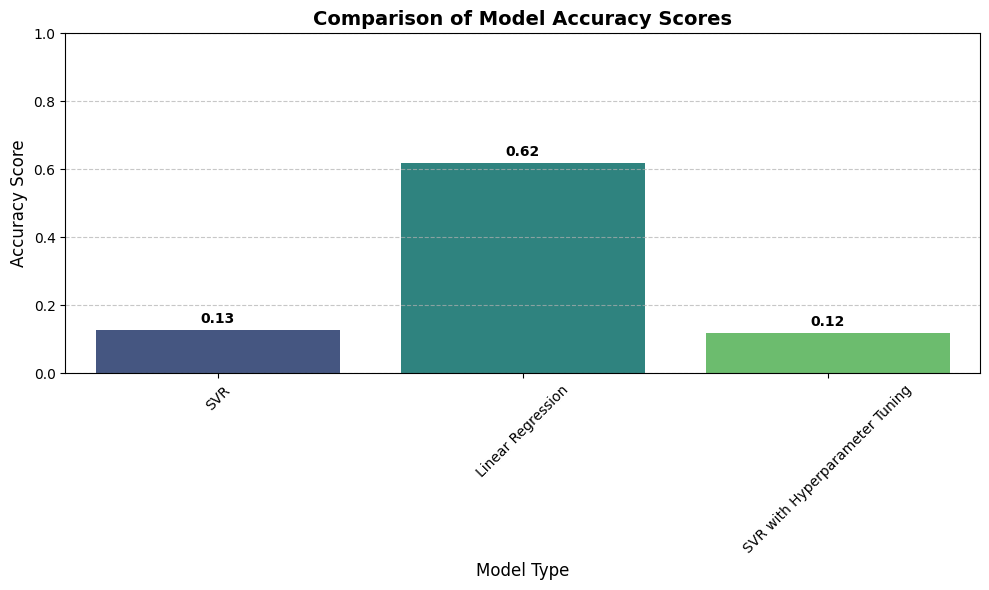

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the accuracy scores of the models
model_names = ['SVR', 'Linear Regression', 'SVR with Hyperparameter Tuning']
accuracy_scores = [0.128, 0.62, 0.120]  # Replace these with your actual accuracy scores

# Create a DataFrame for easy plotting (optional, but helpful for larger datasets)
import pandas as pd
df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.title('Comparison of Model Accuracy Scores', fontsize=14, fontweight='bold')
plt.xlabel('Model Type', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1)  # Since accuracy is between 0 and 1
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate each bar with the accuracy score
for index, row in df.iterrows():
    plt.text(index, row.Accuracy + 0.01, round(row.Accuracy, 2), ha='center', va='bottom', fontweight='bold')

plt.show()


## **3.3 Tree Models**

### 3.3.1 Decision Tree

In [12]:
# Defining the Model
dt = DecisionTreeRegressor(random_state=41)

# Fitting the Model
dt.fit(x_train , y_train)


DecisionTreeRegressor(random_state=41)

In [25]:
from sklearn.metrics import accuracy_score
# Predicting The Values
y_pred = dt.predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)

print("The MSE is : " , mse)
print("The MAE is : " , mae)
print("The R2 score  is : " , r2)

The MSE is :  4664171757.743944
The MAE is :  43777.60828488372
The R2 score  is :  0.657086884653624


### 3.3.2 Random Forrest

In [16]:
# Initializing The Model
rf = RandomForestRegressor(random_state=42)

# Fitting the model
rf.fit(x_train , y_train)

RandomForestRegressor(random_state=42)

In [24]:
from sklearn.metrics import accuracy_score
# Predicting The Values
y_pred = rf.predict(x_test)

# Accuracy Score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print("The MSE is : " , mse)
print("The MAE is : " , mae)
print("The R2 score  is : " , r2)

The MSE is :  2398630785.009868
The MAE is :  31643.65566860465
The R2 score  is :  0.657086884653624


### 3.3.3 Gradient Boosting Regressor

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Instantiate the regressor
gbt = GradientBoostingRegressor(
    n_estimators=300,
    max_depth=1,
    subsample=0.8,
    max_features=0.2,
    random_state=42
)

# Fitting the model
gbt.fit(x_train, y_train)


GradientBoostingRegressor(max_depth=1, max_features=0.2, n_estimators=300,
                          random_state=42, subsample=0.8)

In [23]:

# Predicting values
y_pred = gbt.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The Mean Squared Error of the Gradient Boosting Regressor is", mse)
print("The Mean Absolute Error of the Gradient Boosting Regressor is", mae)
print("The R^2 Score of the Gradient Boosting Regressor is", r2)


The Mean Squared Error of the Gradient Boosting Regressor is 4493564251.064484
The Mean Absolute Error of the Gradient Boosting Regressor is 47882.28958697085
The R^2 Score of the Gradient Boosting Regressor is 0.657086884653624


<ipython-input-26-b66f9e4eae6a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')


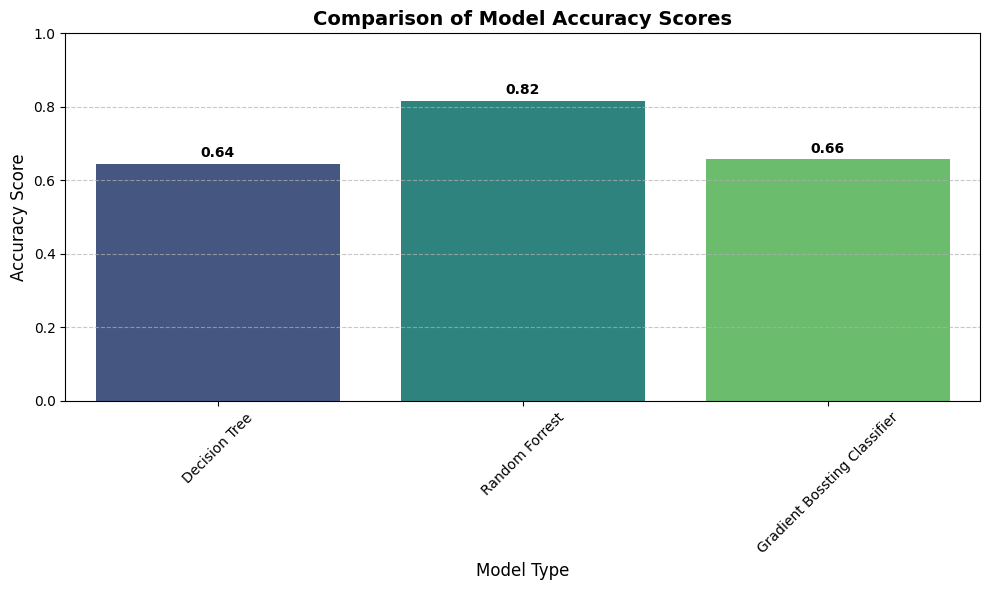

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the accuracy scores of the models
model_names = ['Decision Tree', 'Random Forrest', 'Gradient Bossting Classifier']
accuracy_scores = [r2_dt, r2_rf, r2]  # Replace these with your actual accuracy scores

# Create a DataFrame for easy plotting (optional, but helpful for larger datasets)
import pandas as pd
df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.title('Comparison of Model Accuracy Scores', fontsize=14, fontweight='bold')
plt.xlabel('Model Type', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1)  # Since accuracy is between 0 and 1
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate each bar with the accuracy score
for index, row in df.iterrows():
    plt.text(index, row.Accuracy + 0.01, round(row.Accuracy, 2), ha='center', va='bottom', fontweight='bold')

plt.show()


## Conclusion and Next Steps

In this notebook, we undertook a comprehensive exploratory data analysis (EDA) of the California Housing Prices dataset, with the goal of understanding and preparing the data for building predictive models. Here’s a summary of what we accomplished and considerations for further steps:

### Summary of Data Analysis and EDA Steps

#### Initial Data Inspection
- We began by inspecting the dataset’s structure using basic commands like `head()`, `info()`, and `describe()`.
- This initial examination provided a clear picture of the data types, missing values, and basic statistics for each feature.

#### Handling Missing Values
- We identified and analyzed missing values in the `totalBedrooms` column. After exploring various approaches, we decided how to handle these missing values based on the context of our analysis (e.g., filling with median values, dropping rows, or using interpolation).

#### Outlier Detection and Handling
- We identified outliers in several features using boxplots and statistical methods such as the Interquartile Range (IQR).
- Although outliers were identified, a conscious decision was made to retain them based on their potential importance for housing market analysis.

#### Feature Analysis and Correlation
- We performed correlation analysis to understand relationships between numerical features.
- A heatmap was used to visualize correlations, revealing strong relationships between `medianHouseValue` and other features such as `medianIncome`, as well as any potential multicollinearity among features.
- This analysis highlighted potential key predictors for housing prices.

#### Feature Engineering (Optional Considerations)
- We discussed creating new features, such as `rooms_per_household` or `bedrooms_per_room`, which may provide further insights or enhance the predictive power of our models.

#### Categorical Data Handling
- Although we focused mainly on numerical data, we addressed how to handle the categorical `oceanProximity` column through encoding techniques, such as one-hot encoding.

#### Scaling and Normalization (Future Considerations)
- While not implemented here, we considered the need for scaling or normalization for certain machine learning algorithms that are sensitive to feature scales.
- Tree-based models typically do not require scaling, but other algorithms, such as linear regression or KNN, do.

#### Splitting the Data for Modeling
- To prepare for machine learning modeling, we outlined a data-splitting step using `train_test_split` to create training and testing sets, ensuring robust model evaluation.

### Implementing Machine Learning

#### Implementing a Machine Learning Model
- With data preparation complete, the next logical step is to apply machine learning models to predict `medianHouseValue`.
- Consider experimenting with multiple models such as Linear Regression, Decision Trees, Random Forest, Gradient Boosting Machines, and more. Evaluate their performance using metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

#### Hyperparameter Tuning
- Once you have a baseline model, fine-tune it using techniques like `GridSearchCV` or `RandomizedSearchCV` to optimize performance.

#### Cross-Validation
- Implement cross-validation to ensure the robustness and generalizability of your model.

#### Model Interpretability
- Analyze feature importances, partial dependence plots, and SHAP (SHapley Additive exPlanations) values to gain deeper insights into how features contribute to predictions.

#### Additional Feature Engineering
- Consider creating new features based on domain knowledge or observed data patterns that may enhance predictive accuracy.

#### Address Multicollinearity
- If using models sensitive to multicollinearity (e.g., Linear Regression), consider techniques such as Principal Component Analysis (PCA) or dropping redundant features.


### If you like the notebook, consider giving an upvote.
Check my other notebooks

1. https://github.com/FaizanSSDQ/Machine-Learning-Projects/tree/main/Digit-Classifier-ANN-Keras
2. https://github.com/FaizanSSDQ/Machine-Learning-Projects/tree/main/Digit-Classifier-CNN-Tensorflow
3. https://github.com/FaizanSSDQ/Machine-Learning-Projects/tree/main/Intel-8-Class-CNN-Model
